In [3]:
##%%writefile multiple_rematch.py
#%load multiple_rematch.py
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('ggplot')

import rematch_df as rem


mult_rematch_list = [each for each in rem.rematch_list if len(each)>2]
len(mult_rematch_list)

mult_dict = {}
for each in mult_rematch_list:
    if len(each) not in mult_dict:
        mult_dict[len(each)] = []
    mult_dict[len(each)].append(each)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Kelly/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
mult_dict

{4: [{'1980-CA-36', '1982-CA-36', '1984-CA-36', '1988-CA-36'},
  {'1982-OH-10', '1984-OH-10', '1986-OH-10', '1988-OH-10'},
  {'1992-CA-05', '1994-CA-05', '1996-CA-05', '1998-CA-05'},
  {'1992-NC-01', '1994-NC-01', '1996-NC-01', '1998-NC-01'},
  {'1998-OH-02', '2000-OH-02', '2002-OH-02', '2004-OH-02'},
  {'2000-WI-01', '2002-WI-01', '2004-WI-01', '2006-WI-01'},
  {'2002-IN-09', '2004-IN-09', '2006-IN-09', '2008-IN-09'},
  {'2006-KY-05', '2012-KY-05', '2014-KY-05', '2018-KY-05'},
  {'2010-NH-01', '2012-NH-01', '2014-NH-01', '2016-NH-01'},
  {'2012-TX-01', '2014-TX-01', '2016-TX-01', '2018-TX-01'}],
 3: [{'1980-CA-37', '1992-CA-40', '1994-CA-40'},
  {'1980-MD-02', '1982-MD-02', '1984-MD-02'},
  {'1980-OH-05', '1982-OH-05', '1984-OH-05'},
  {'1980-UT-01', '1986-UT-01', '1988-UT-01'},
  {'1980-WA-05', '1982-WA-05', '1992-WA-05'},
  {'1982-CT-01', '1984-CT-01', '1986-CT-01'},
  {'1982-IL-21', '1984-IL-21', '1986-IL-21'},
  {'1982-NC-11', '1984-NC-11', '1986-NC-11'},
  {'1982-PA-03', '1992-PA

In [6]:
mult_rematch_list = [each for each in rem.rematch_list if len(each)>2]
mult_rematch_list
mult_dict = {}
for each in mult_rematch_list:
    if len(each) not in mult_dict:
        mult_dict[len(each)] = []
    mult_dict[len(each)].append(each)

In [7]:
for x in range(3,7):
    print(f'Number of {x}-race rematches: ', len(mult_dict[x]))

Number of 3-race rematches:  52
Number of 4-race rematches:  10
Number of 5-race rematches:  3
Number of 6-race rematches:  2


In [61]:
mult_dict[4]

[{'1980-CA-36', '1982-CA-36', '1984-CA-36', '1988-CA-36'},
 {'1982-OH-10', '1984-OH-10', '1986-OH-10', '1988-OH-10'},
 {'1992-CA-05', '1994-CA-05', '1996-CA-05', '1998-CA-05'},
 {'1992-NC-01', '1994-NC-01', '1996-NC-01', '1998-NC-01'},
 {'1998-OH-02', '2000-OH-02', '2002-OH-02', '2004-OH-02'},
 {'2000-WI-01', '2002-WI-01', '2004-WI-01', '2006-WI-01'},
 {'2002-IN-09', '2004-IN-09', '2006-IN-09', '2008-IN-09'},
 {'2006-KY-05', '2012-KY-05', '2014-KY-05', '2018-KY-05'},
 {'2010-NH-01', '2012-NH-01', '2014-NH-01', '2016-NH-01'},
 {'2012-TX-01', '2014-TX-01', '2016-TX-01', '2018-TX-01'}]

In [14]:
mult_rem_elec_id = [] 
for x in range(3,7):
    for y in mult_dict[x]:
        for z in y:
            mult_rem_elec_id.append(z)
#mult_rem_elec_id #list of all elec ids with more than two rematches

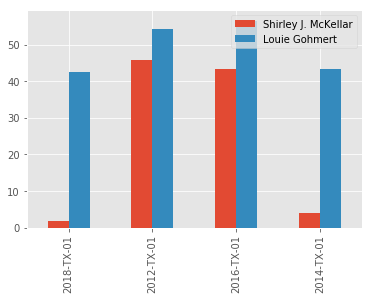

In [77]:
x_group = [[],[]]
y_group = [[],[]]

for i in range(len(mult_dict[4])):
    a = rem.rematch_cut[rem.rematch_cut['elec_id']==list((mult_dict[4])[i])[0]].sort_values('FEC_ID').reset_index()
    b = rem.rematch_cut[rem.rematch_cut['elec_id']==list((mult_dict[4])[i])[1]].sort_values('FEC_ID').reset_index()
    c = rem.rematch_cut[rem.rematch_cut['elec_id']==list((mult_dict[4])[i])[2]].sort_values('FEC_ID').reset_index()
    d = rem.rematch_cut[rem.rematch_cut['elec_id']==list((mult_dict[4])[i])[3]].sort_values('FEC_ID').reset_index()

    a.set_index('FEC_ID')
    b.set_index('FEC_ID')
    c.set_index('FEC_ID')
    d.set_index('FEC_ID')

    x0 = a['vote%']
    y0 = a['TTL_DISB']
    x1 = b['vote%']
    y1 = b['TTL_DISB']
    x2 = c['vote%']
    y2 = c['TTL_DISB']
    x3 = d['vote%']  
    y3 = d['TTL_DISB']
    
    x_list0 = [round(each, 2) for each in [x0[0], x1[0], x2[0], x3[0]]]
    x_group[0].append(x_list0)
    y_list0 = [round(each, 2) for each in [y0[0], y1[0], y2[0], y3[0]]]
    y_group[0].append(y_list0)
    
    x_list1 = [round(each, 2) for each in [x0[1], x1[1], x2[1], x3[1]]]
    x_group[1].append(x_list1)
    y_list1 = [round(each, 2) for each in [y0[1], y1[1], y2[1], y3[1]]]
    y_group[1].append(y_list1)


my_df = pd.DataFrame([x_group[0][0],x_group[1][0]], index=[a['candidate'][0], a['candidate'][1]], columns=[a['elec_id'][0], b['elec_id'][0], c['elec_id'][0], d['elec_id'][0]]).transpose()
my_df.plot(kind='bar')

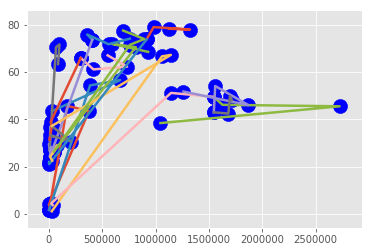

In [64]:
fig, ax = plt.subplots()
for i in range(len(x_group)):
    x = x_group[i]
    y = enumerate(x_group[i])
    
    ax.plot(y, x, linewidth=2.5, zorder=2) 
    ax.scatter(y, x, s=200, zorder=1)

In [42]:
b

,index,FEC_ID,elec_id,year,candidate,candidatevotes,vote%,office,party,state,district,INC_STATUS,totalvotes,TTL_RECEIPTS,TTL_DISB,delta_vote,delta_spend
0,16493,H2TX01062,2018-TX-01,2018,Shirley J. McKellar,61263,26.32,US House,democrat,Texas,1,C,232720,48199.13,47552.69,0.0,0.0
1,16492,H4TX04039,2018-TX-01,2018,Louie Gohmert,168165,72.26,US House,republican,Texas,1,I,232720,826202.18,787021.73,0.0,0.0


In [29]:
len(x4_rematch_elec_id)

40